In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df_it = pd.read_csv('Data/ItImp_data.csv', index_col=[0])
df_knn = pd.read_csv('Data/KNN_data.csv', index_col=[0])
#df = pd.read_csv('Data/Processed_data_full.csv', index_col=[0])

In [32]:
print(df_it.shape)
print(df_knn.shape)

(10000, 41)
(10000, 41)


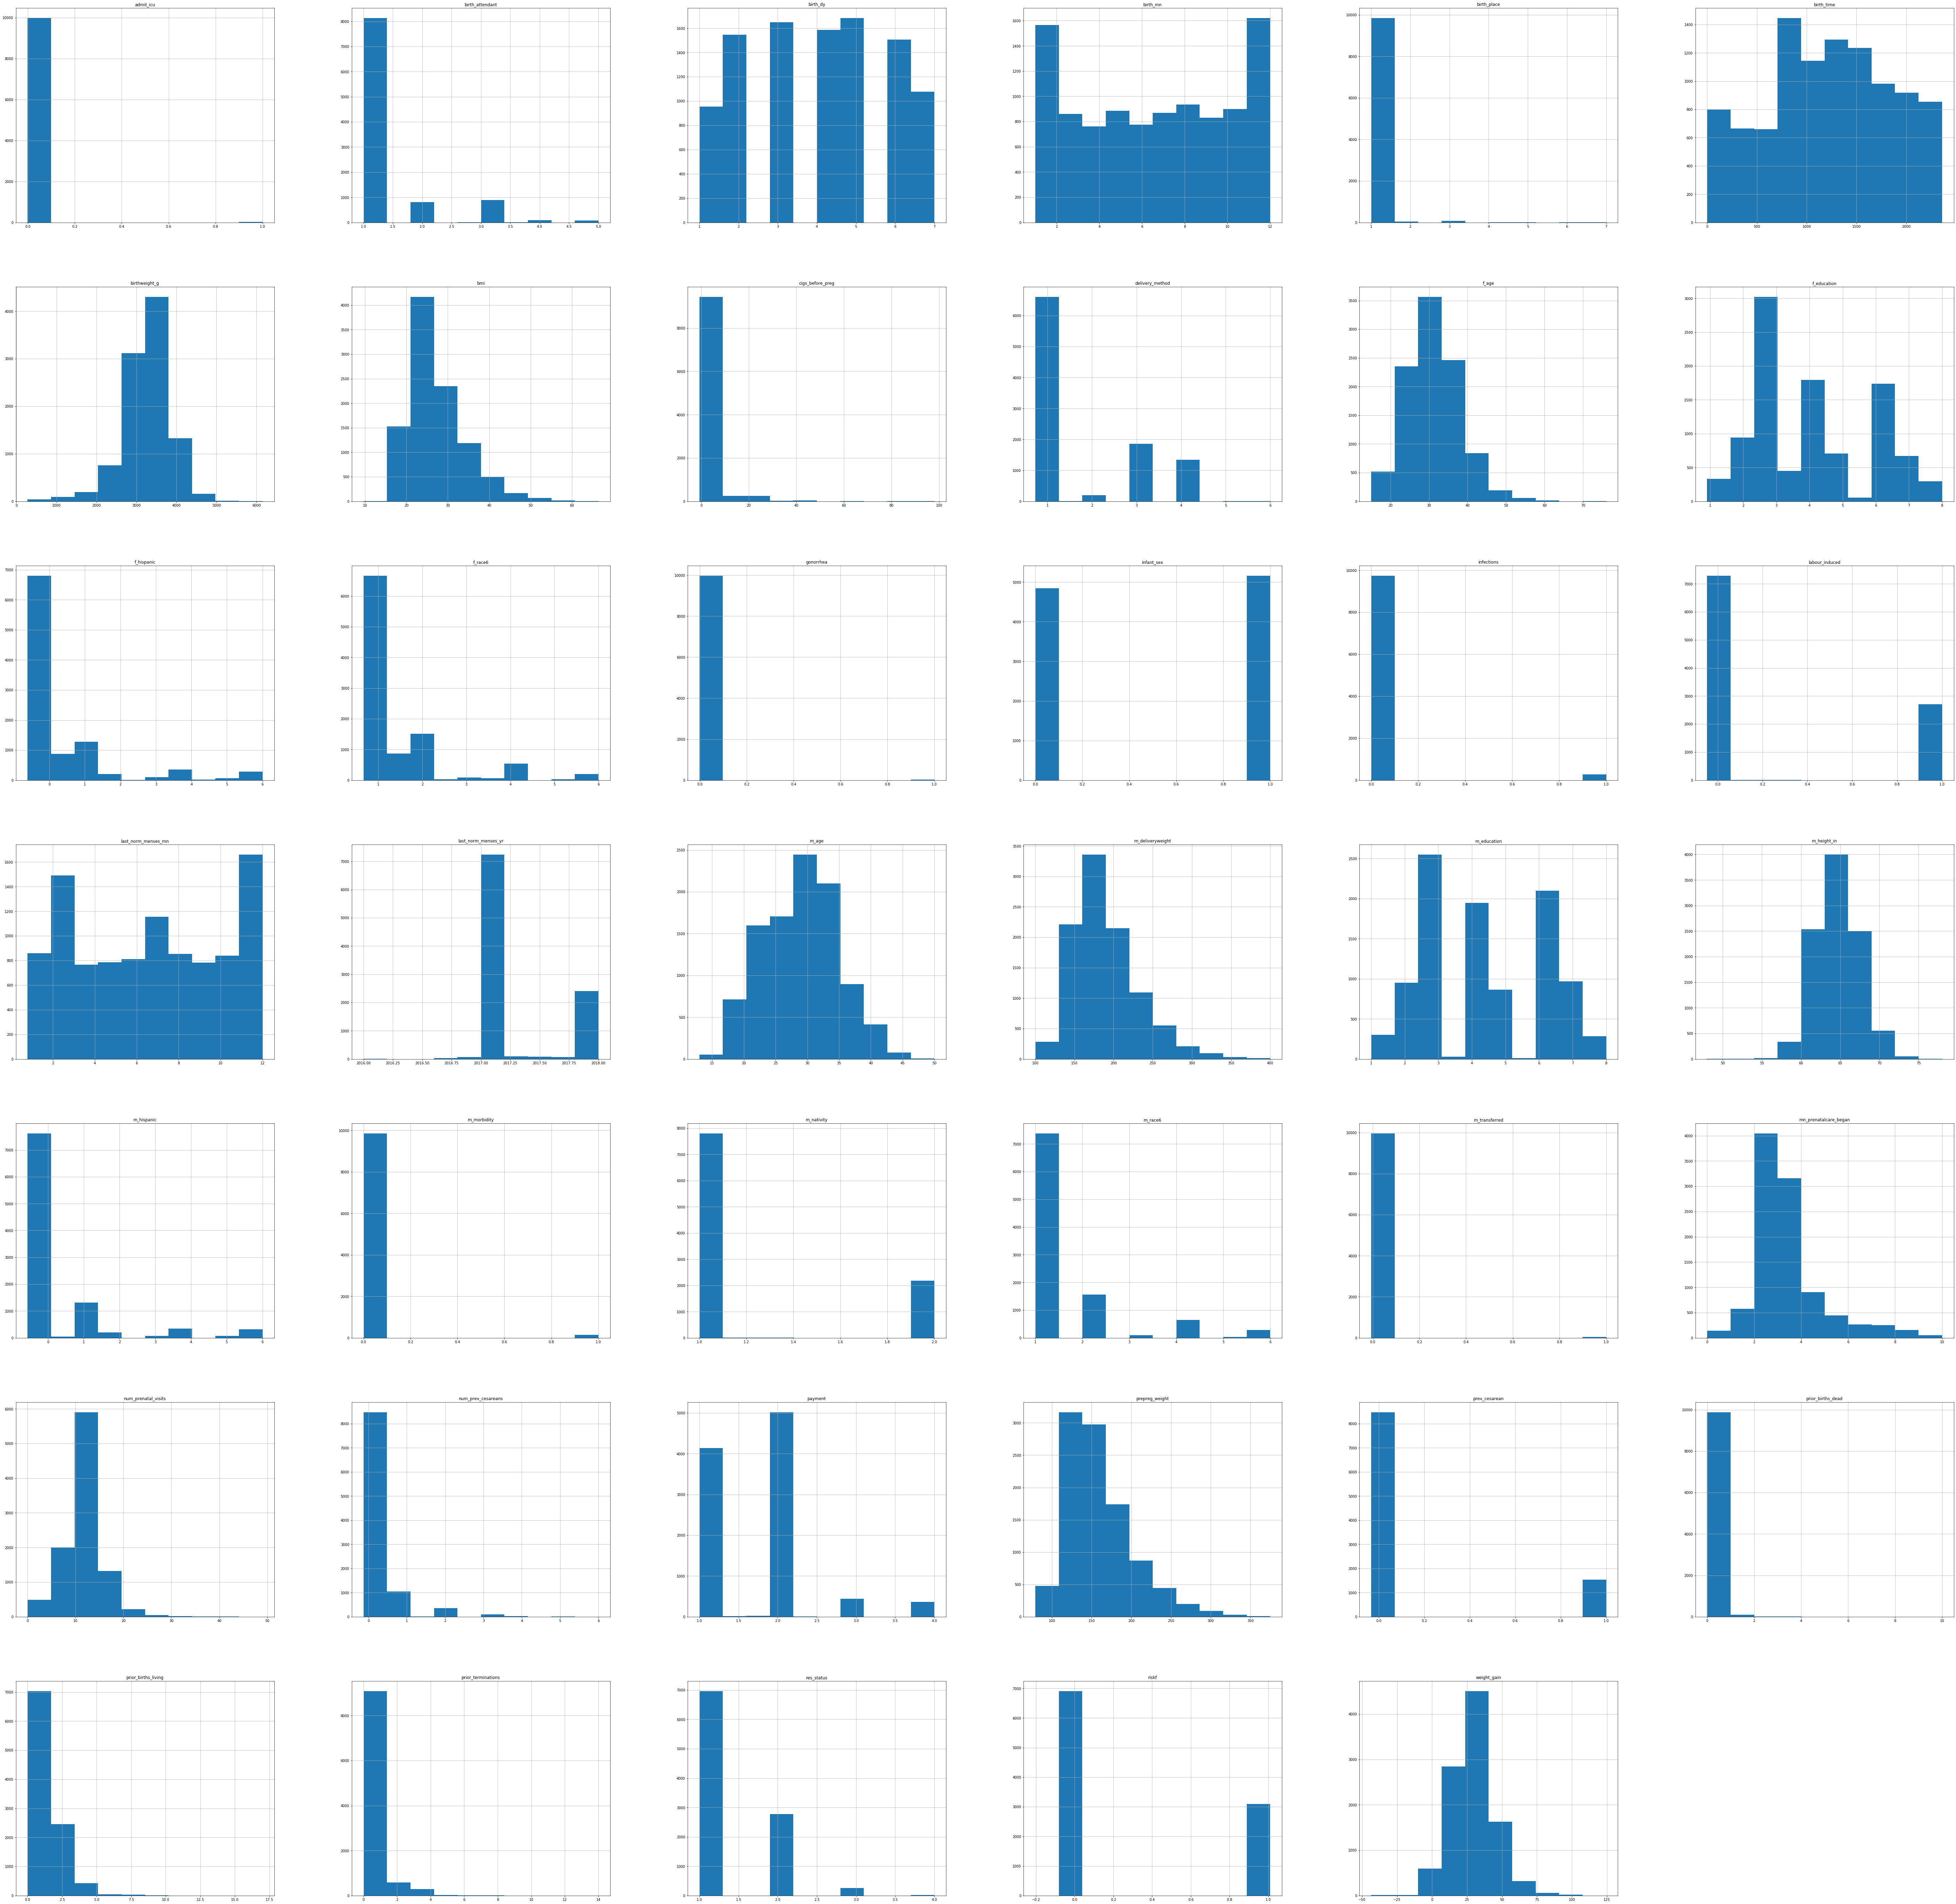

In [38]:
df_it.hist(figsize = (100,100))
plt.show()

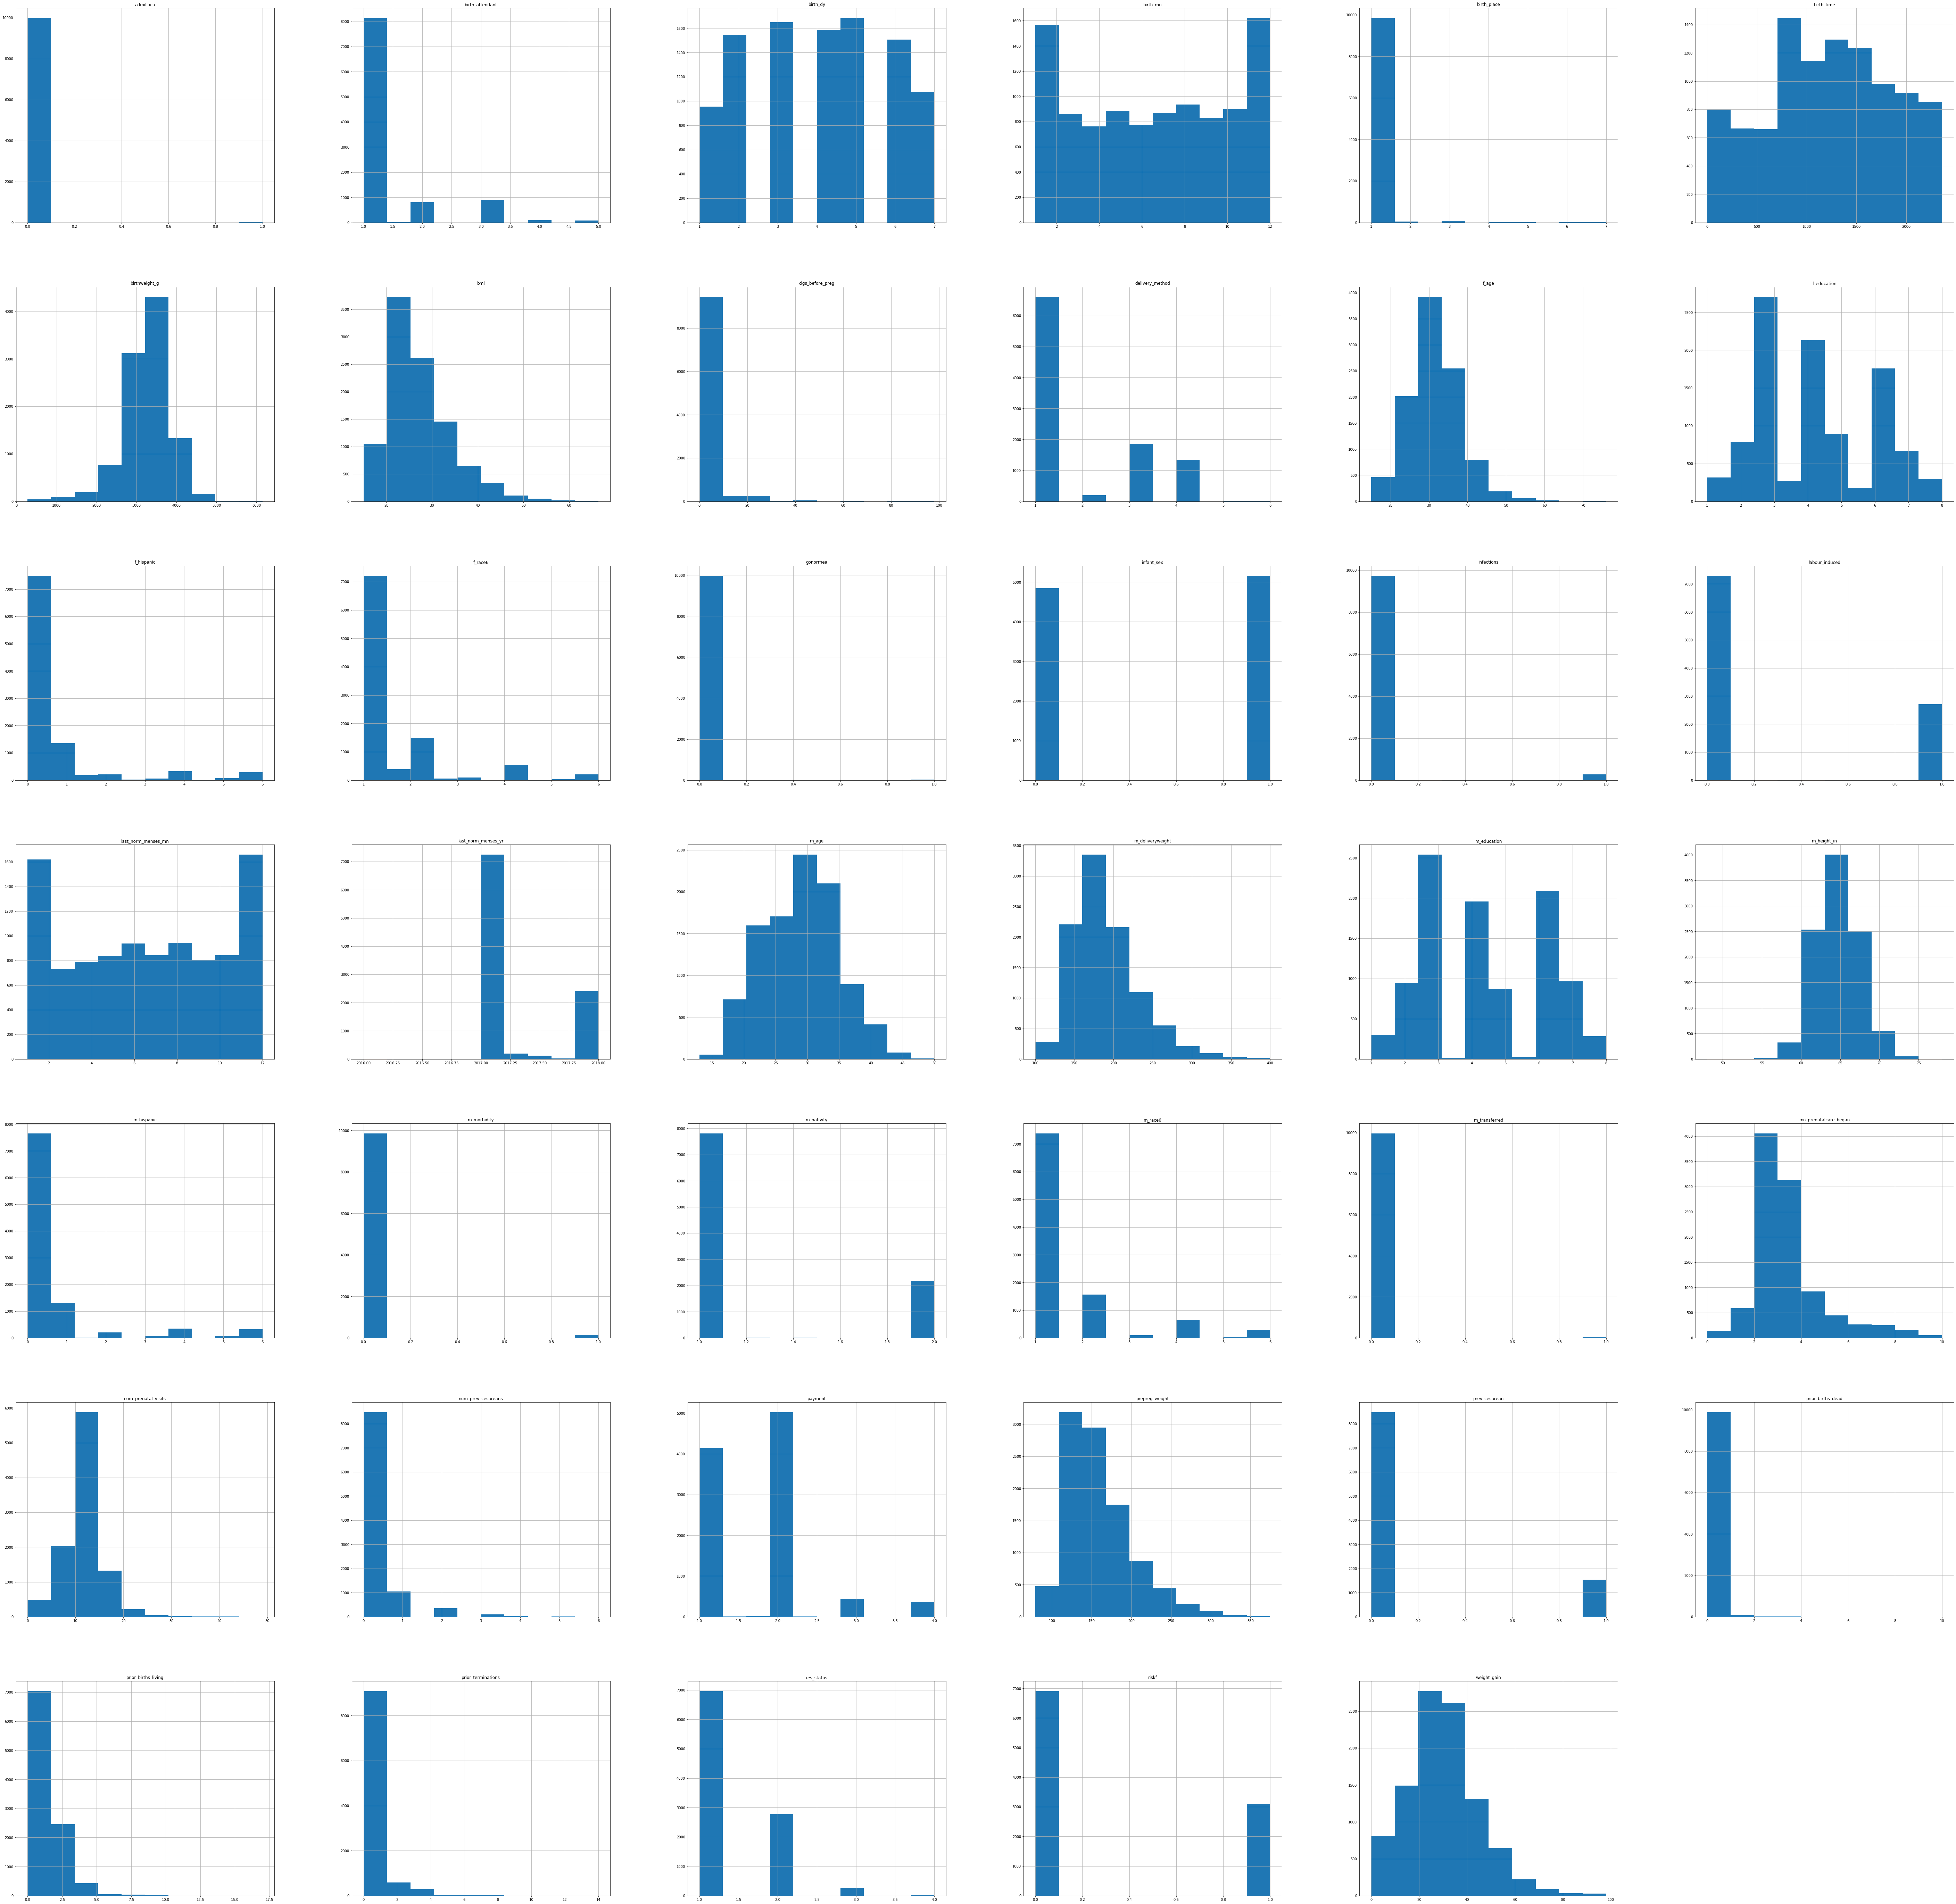

In [39]:
df_knn.hist(figsize = (100,100))
plt.show()

In [ ]:
corr_matrix = df_it.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))

plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, mask=mask, square=True, vmin=-1, vmax=1)
plt.show()

In [ ]:
corr_matrix = df_knn.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))

plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, mask=mask, square=True, vmin=-1, vmax=1)
plt.show()

In [ ]:
df_it['weight_change'] = df_it['m_deliveryweight'] - df_it['prepreg_weight']
df_knn['weight_change'] = df_knn['m_deliveryweight'] - df_knn['prepreg_weight']

C:\Users\catri\Anaconda\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\catri\Anaconda\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


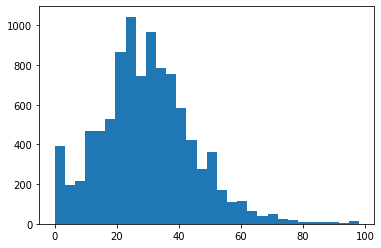

In [11]:
plt.hist(df['weight_gain'], bins=30);

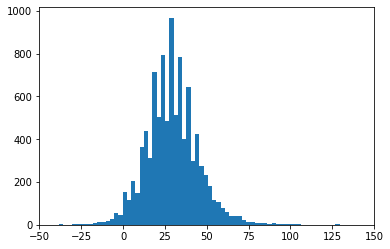

In [12]:
plt.hist(df['weight_change'], bins=70)
plt.xlim(-50, 150);

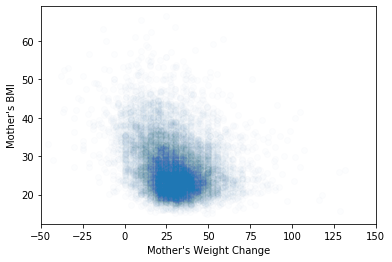

In [13]:
plt.scatter(df['weight_change'], df['bmi'], alpha=0.01)
plt.xlabel('Mother\'s Weight Change')
plt.ylabel('Mother\'s BMI')
plt.xlim(-50, 150)
plt.show()

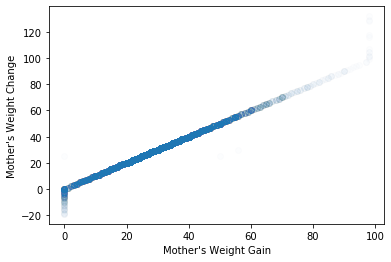

In [14]:
plt.scatter(df['weight_gain'], df['weight_change'], alpha=0.01)
plt.xlabel('Mother\'s Weight Gain')
plt.ylabel('Mother\'s Weight Change')
plt.show()

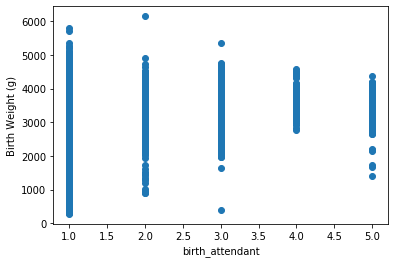

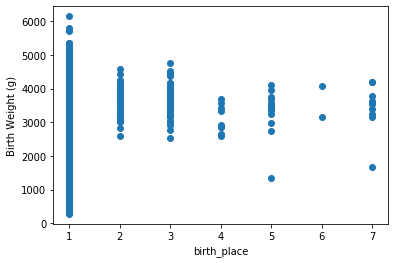

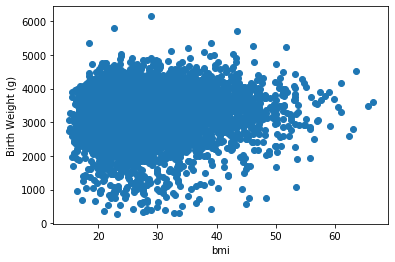

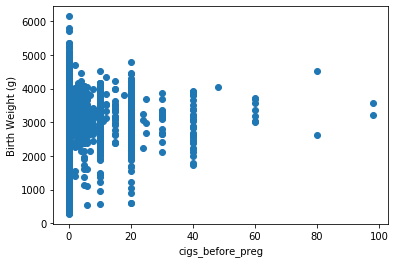

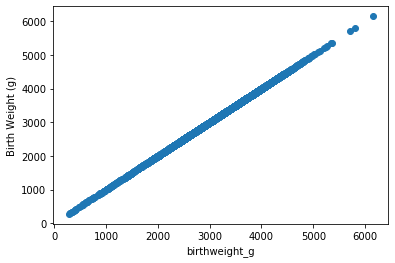

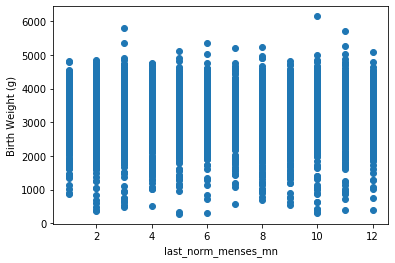

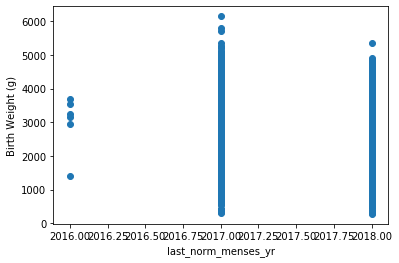

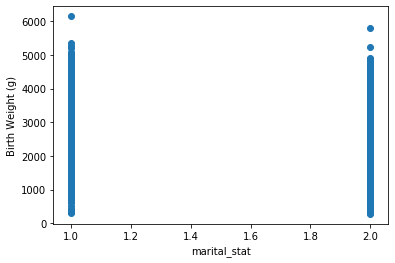

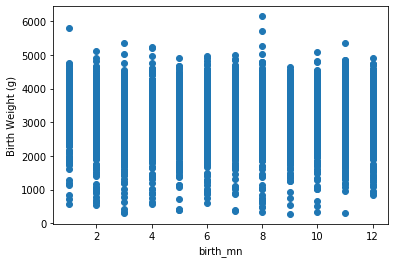

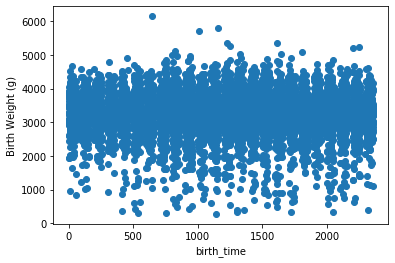

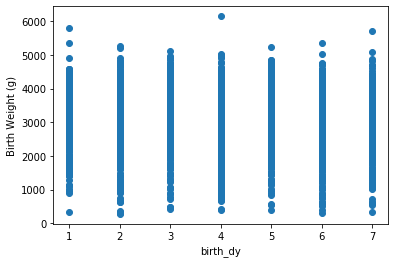

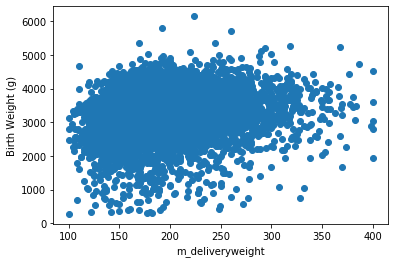

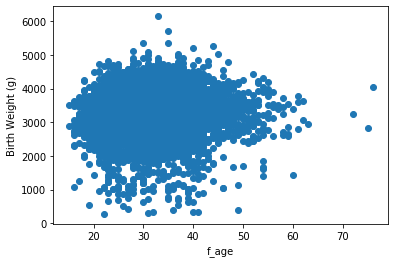

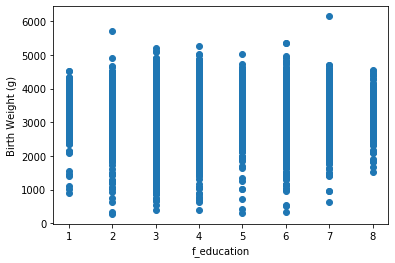

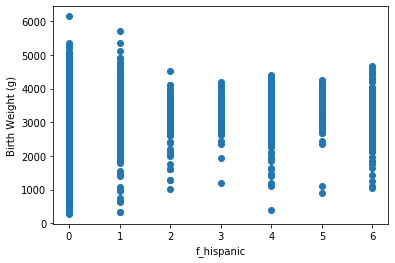

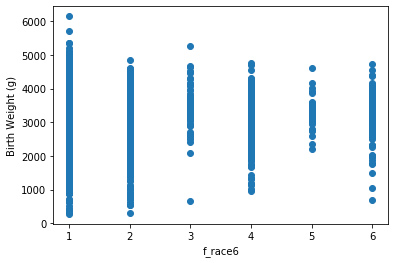

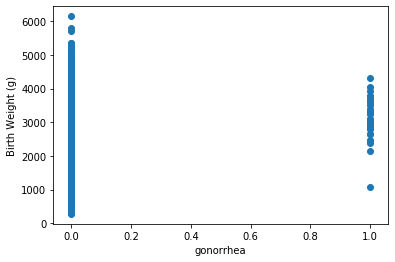

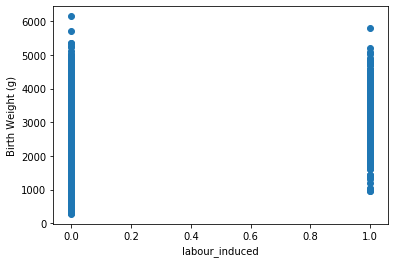

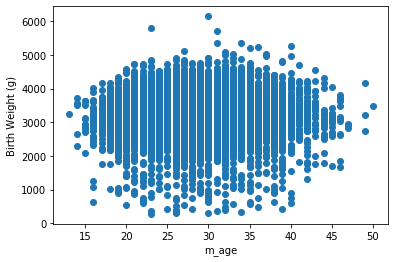

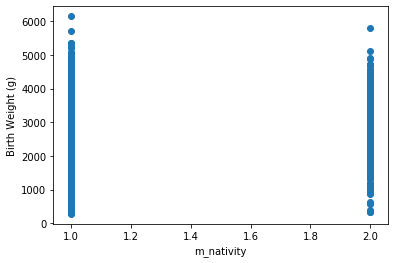

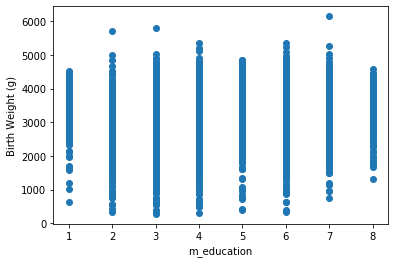

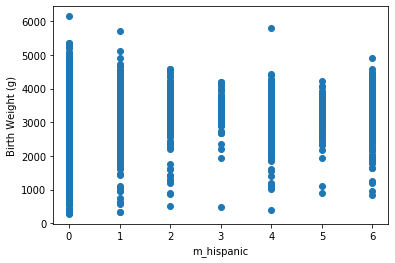

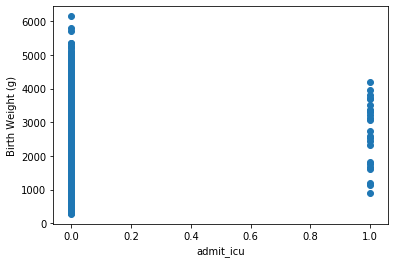

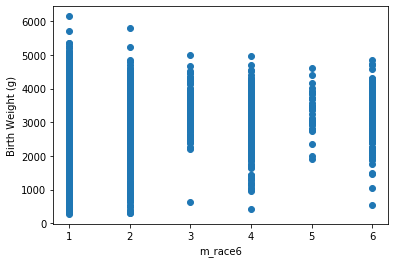

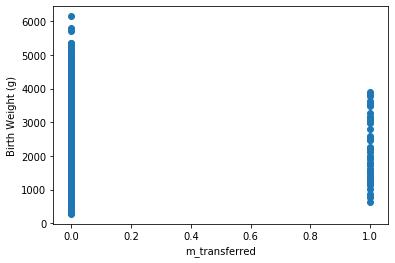

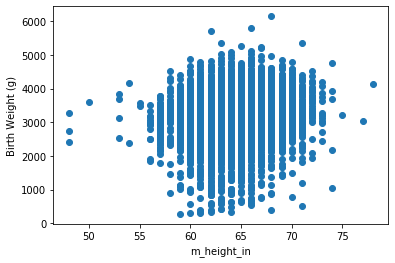

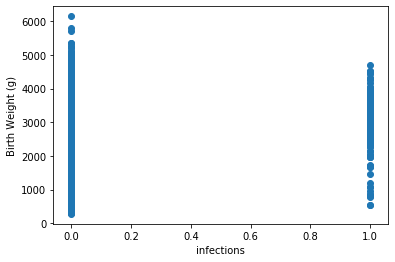

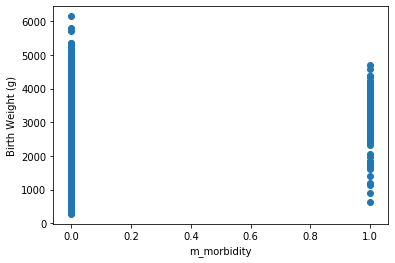

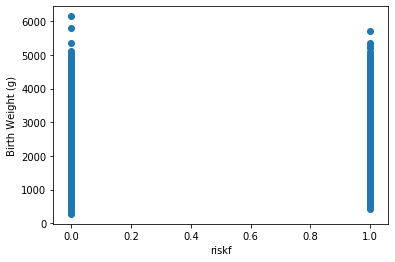

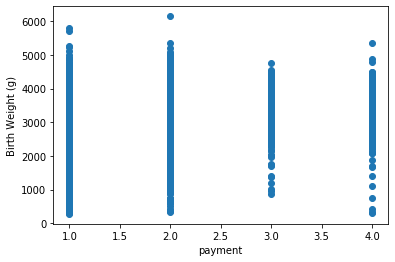

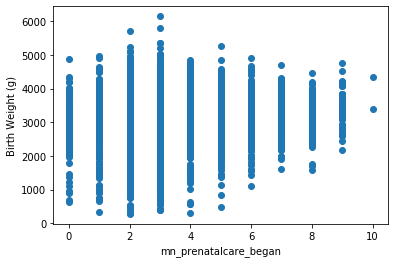

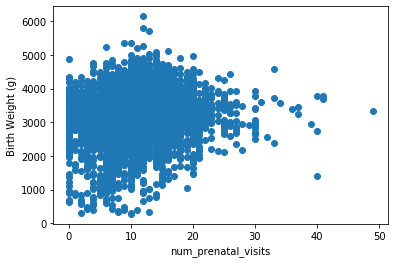

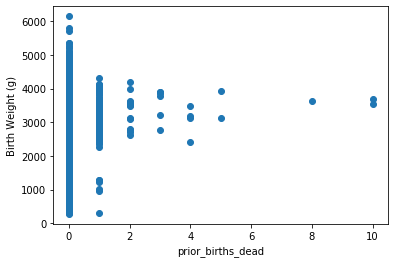

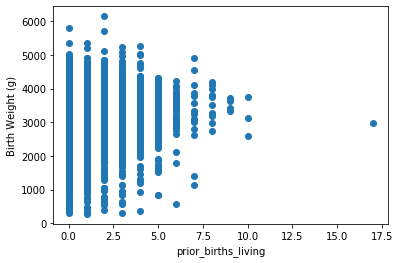

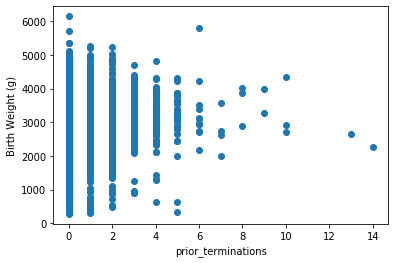

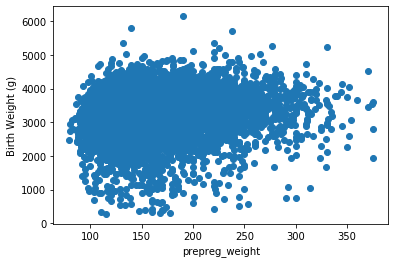

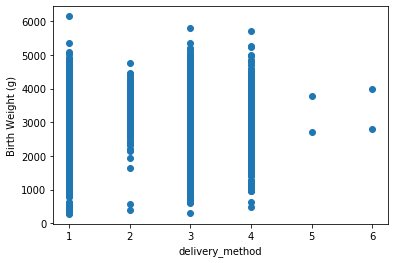

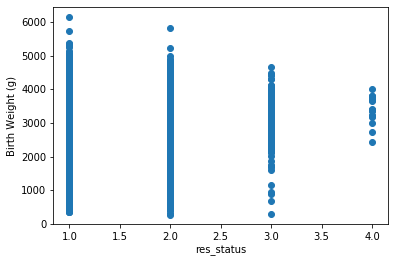

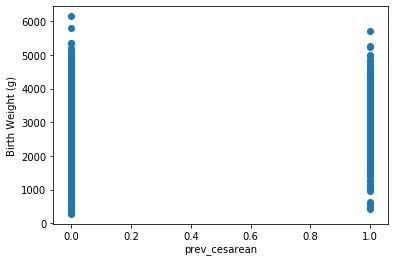

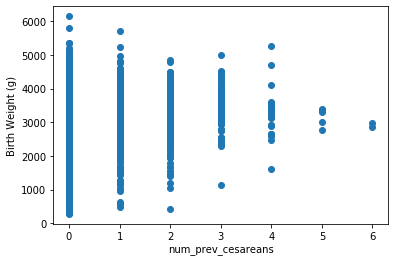

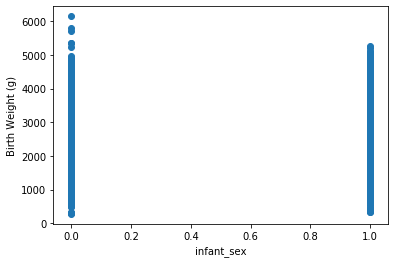

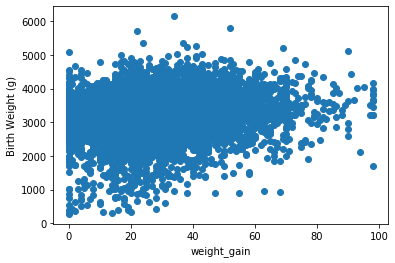

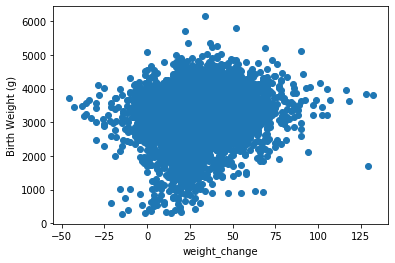

In [15]:
columns = list(df.columns)

for i in columns:
    plt.scatter(df[i], df['birthweight_g'])
    plt.xlabel(i)
    plt.ylabel("Birth Weight (g)")
    plt.show()

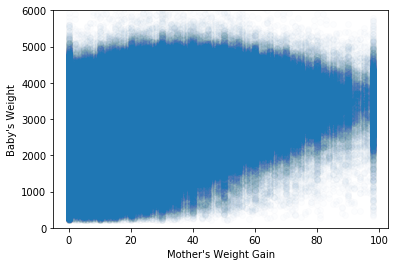

In [64]:
plt.scatter(df['weight_gain'], df['birthweight_g'], alpha=0.01)
plt.xlabel('Mother\'s Weight Gain')
plt.ylabel('Baby\'s Weight')
plt.ylim(0, 6000)
plt.show()

#### Looking at birthweight

In [65]:
print('{:.2f}% of infants born in US in 2018 were LBW infants'.\
      format(1e2*len(df[df['birthweight_g'] < 2500])/len(df)))

8.27% of infants born in US in 2018 were LBW infants


C:\Users\catri\Anaconda\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\catri\Anaconda\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


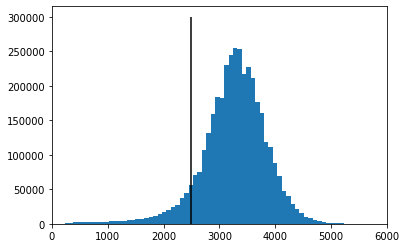

In [66]:
plt.hist(df['birthweight_g'], bins=10**2)
plt.xlim(0, 6*10**3)
plt.vlines(2500, 0, 3*10**5)
plt.show()

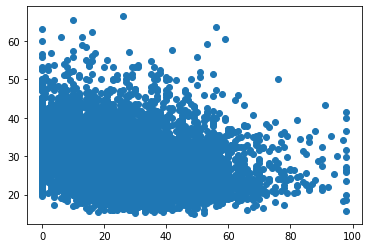

In [16]:
plt.scatter(df['weight_gain'], df['bmi']);

#### Visualisation of PCA

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [22]:
X = df.drop(['birthweight_g'], axis=1)
y = df['birthweight_g']

In [23]:
scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

In [24]:
pca = PCA(n_components=5)
pca.fit(X_scaled)

x_new = pca.transform(X_scaled)

In [25]:
x_new.shape

(10000, 5)

* Biplot

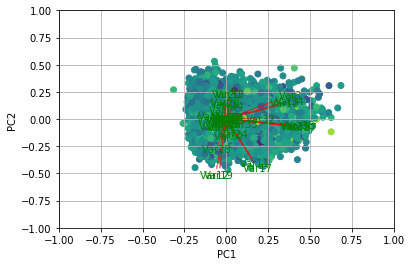

In [26]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

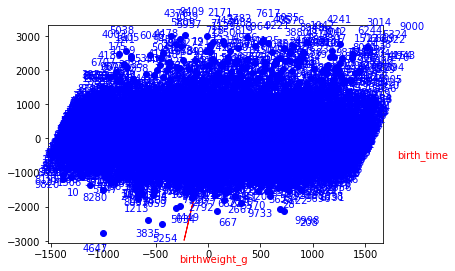

In [27]:
dat = df.copy()
# if no row or column titles in your csv, pass 'header=None' into read_csv
# and delete 'index_col=0' -- but your biplot will be clearer with row/col names



## perform PCA

n = len(dat.columns)

pca = PCA(n_components = n)
# defaults number of PCs to number of columns in imported data (ie number of
# features), but can be set to any integer less than or equal to that value

pca.fit(dat)



## project data into PC space

# 0,1 denote PC1 and PC2; change values for other PCs
xvector = pca.components_[0] # see 'prcomp(my_data)$rotation' in R
yvector = pca.components_[1]

xs = pca.transform(dat)[:,0] # see 'prcomp(my_data)$x' in R
ys = pca.transform(dat)[:,1]




## visualize projections
    
## Note: scale values for arrows and text are a bit inelegant as of now,
##       so feel free to play around with them

for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
             list(dat.columns.values)[i], color='r')

for i in range(len(xs)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.plot(xs[i], ys[i], 'bo')
    plt.text(xs[i]*1.2, ys[i]*1.2, list(dat.index)[i], color='b')

plt.show()